Explore `pandas`. Specifically explore the possibility of using it to store results for a run of conditional generation.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#%config InlineBackend.figure_format = 'svg'
#%config InlineBackend.figure_format = 'pdf'

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import autograd.numpy as np
import scipy.stats as stats
import torch
import tensorflow as tf

In [3]:
import kbrgan
import kbrgan.glo as glo
import kbrgan.imutil as imutil

----------

## Load an image

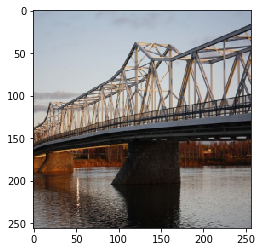

In [4]:
img_path = glo.share_path('lsun_imgs', 'lsun_bridge', 'e.jpg')
img = imutil.load_resize_image(img_path)
# img = PIL.Image.open(img_path)
plt.imshow(img)

In [5]:
stats.describe(img.reshape(-1))

DescribeResult(nobs=196608, minmax=(0.00018382352941187616, 0.9488491881127457), mean=0.46981934348936966, variance=0.07419337943584926, skewness=-0.2462909900904161, kurtosis=-1.4107819611115957)

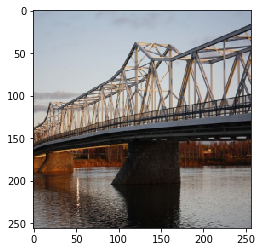

In [6]:
plt.imshow(img)

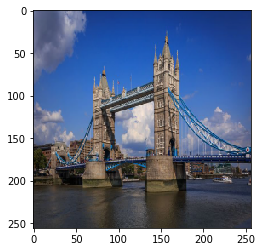

In [7]:
img2 = imutil.load_resize_image(glo.share_path('lsun_imgs', 'lsun_bridge', 'd.jpg'))
plt.imshow(img2)

## Create a dataframe

In [8]:
row_dict_t = {
    'Z/avg_Z': 0.6, 'Z/max_z': 3.2, 'loss/KMM': 0.12, 
    'cond_imgs': [img, img2],
}

In [9]:
df = pd.DataFrame([row_dict_t])

## Display images in a dataframe

In [10]:
# https://www.kaggle.com/stassl/displaying-inline-images-in-pandas-dataframe
import base64
import io
import PIL
import IPython
import skimage

# def get_thumbnail(path):
#     im = PIL.Image.open(path)
#     im.thumbnail((150, 150), Image.LANCZOS)
#     return im

def image_base64(im, resize=128):
    '''
    im: a numpy array whose range is [0,1]
    '''
    with io.BytesIO() as buffer:
        # resize
        im = skimage.transform.resize(im, (resize, resize), mode='reflect', anti_aliasing=True)
        # convert the numpy array to a PIL image
        pil_im = PIL.Image.fromarray(np.uint8(im*255))
        pil_im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def images_formatter(imgs):
    html = u''
    for i in range(len(imgs)):
        img64 = image_base64(imgs[i])
#         print(img64)
        img_tag = '<img src="data:image/jpeg;base64,{}">'.format(img64)
#         img_tag = f'<img src="data:image/jpeg;base64,{img64}">'
        html += img_tag + ' '
#     print(html)
    return html


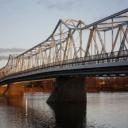

In [11]:
# Display image in HTML as a base64 encoded string
img64 = image_base64(img)
IPython.display.HTML('With an img tag: <img src="data:image/jpeg;base64,{}">'.format(img64))

,Z/avg_Z,Z/max_z,cond_imgs,loss/KMM
0,0.6,3.2,,0.12

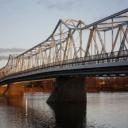
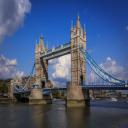

In [12]:
# dataframe to html
pd.set_option('display.max_colwidth', -1)
html = df.to_html(formatters={'cond_imgs': images_formatter}, escape=False)
IPython.display.HTML(html)

In [13]:
len(html)

10509